In [1]:
import os
import json
import matplotlib.pyplot as plt

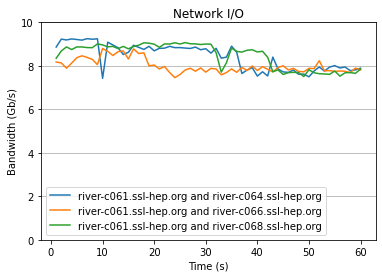

In [2]:
results_dir = '../results'
files = os.listdir(results_dir)

# iterate over each result file and plot the results
for file in files:
    if not file.endswith('.json'): continue
    with open(os.path.join(results_dir, file)) as f:
        results = json.load(f)

    seconds = []
    bandwidth = []

    for run in results["intervals"]:
        seconds.append(float(run["sum"]["end"]))
        bandwidth.append(float(run["sum"]["bits_per_second"])/(1000*1000*1000))

    plt.plot(seconds, bandwidth, markersize=10, linewidth=1.5, label=f"{os.environ['SERVER']} and {file[:-5]}")
    

# pin the range between 0 and 10
plt.ylim(0.0, 10.0)
plt.xlabel('Time (s)')
plt.ylabel('Bandwidth (Gb/s)')
plt.title('Network I/O')
plt.gca().yaxis.grid(True)
plt.legend()
plt.savefig(os.path.join(results_dir, './iperf-benchmarks.png'), dpi=300, bbox_inches='tight')
plt.show()